In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, mpl_loc, fancy_legend, load_mpl_presets
import numpy as np
import math as m
import sys
sys.path.append("..")
from src import asassn_catalog
load_mpl_presets()
print(sys.version_info)

sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


In [31]:
def get_bin_number(bins, qty):
    r"""
    Get the bin number of some test value within some binspace.
    
    Parameters
    ----------
    bins : array-like
        The binspace itself, assumed ordered least to greatest
    qty : ``float``
        The test value to get the bin index for
        
    Returns
    -------
    index : ``int``
        The bin index such that bins[index] <= qty <= bins[index + 1].
        -1 if qty is not contained within the span of ``bins``.
    """
    for i in range(len(bins) - 1):
        if bins[i] <= qty <= bins[i + 1]: return i
    return -1

def distribution(qty, weights, nbins = 25):
    r"""
    Compute a distribution given a list of quantities and their
    weights.
    
    Parameters
    ----------
    qty : array-like
        The quantities to compute a distribution for
    weights : array-like
        The weights on each quantity in the array.
        ``None`` for the raw distribution.
        
    Returns
    -------
    xvals : ``list``
        X-values of the distribution, placed at the center of
        each bin.
    dist : ``list``
        The values of the distribution, normalized to a
        probability density.
    """
    bins = np.linspace(min(qty), max(qty), nbins + 1)
    counts = nbins * [0.]
    for i in range(len(qty)):
        idx = get_bin_number(bins, qty[i])
        if idx >= 0:
            if weights is None:
                counts[idx] += 1
            else:
                counts[idx] += weights[i]
        else: continue
    norm = 0
    for i in range(nbins): norm += counts[i] * (bins[i + 1] - bins[i])
    for i in range(len(counts)): counts[i] /= norm
    xvals = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
    return [xvals, counts]

def distributions(qty, xlabel, nbins = 25):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("PDF")
    xvals, counts = distribution(asassn_catalog[qty], None, nbins = nbins)
    kwargs = {
        "c": named_colors()["blue"],
        "label": "unweighted"
    }
    ax.plot(xvals, counts, **kwargs)
    xvals, counts = distribution(asassn_catalog[qty], asassn_catalog["comp_SNIa"], nbins = nbins)
    kwargs["c"] = named_colors()["lime"]
    kwargs["label"] = "completeness"
    ax.plot(xvals, counts, **kwargs)
    xvals, counts = distribution(asassn_catalog[qty], asassn_catalog["F2_SNIa"], nbins = nbins)
    kwargs["c"] = named_colors()["crimson"]
    kwargs["label"] = "volumetric"
    ax.plot(xvals, counts, **kwargs)
    xvals, counts = distribution(asassn_catalog[qty], asassn_catalog["weighted_N"], nbins = nbins)
    kwargs["c"] = named_colors()["black"]
    kwargs["label"] = "total"
    ax.plot(xvals, counts, **kwargs)

    ax.set_ylim([0, ax.get_ylim()[1]])
    kwargs = {
#         "loc": mpl_loc("upper right"),
        "ncol": 1,
        "frameon": False,
        "handlelength": 0,
        "fontsize": 22
    }
    leg = ax.legend(**kwargs)
    fancy_legend(leg, ["blue", "lime", "crimson", "black"])

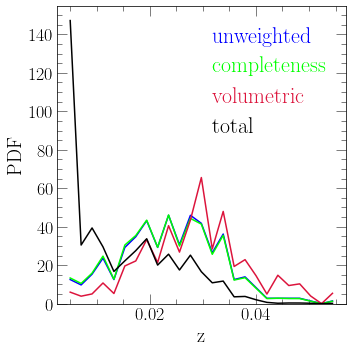

In [32]:
distributions("Redshift", "z")
plt.tight_layout()
plt.show()

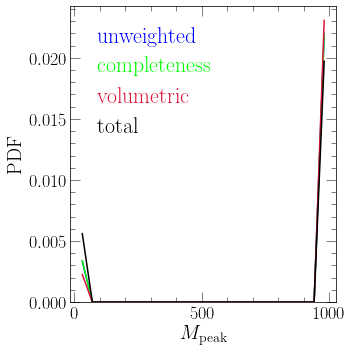

In [33]:
distributions("PeakMag", r"$m_\text{peak}$")
plt.tight_layout()
plt.show()

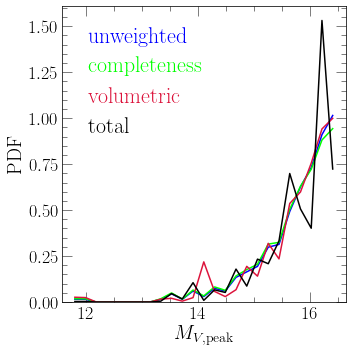

In [34]:
distributions("PeakMagV", r"$m_{V,\text{peak}}$")
plt.tight_layout()
plt.show()

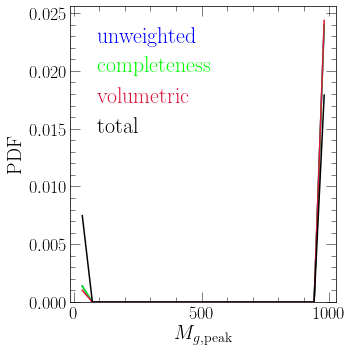

In [35]:
distributions("PeakMagg", r"$m_{g,\text{peak}}$")
plt.tight_layout()
plt.show()

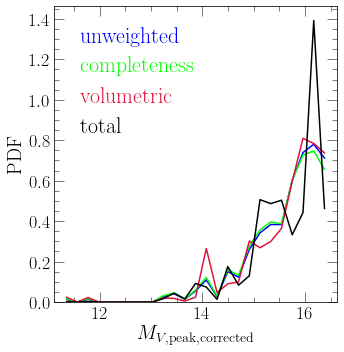

In [36]:
distributions("MagV_corrected", r"$m_{V,\text{peak},\text{corrected}}$")
plt.tight_layout()
plt.show()

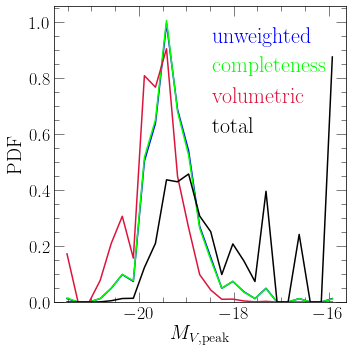

In [37]:
distributions("abs_M_peak", r"$M_{V,\text{peak}}$")
plt.tight_layout()
plt.show()

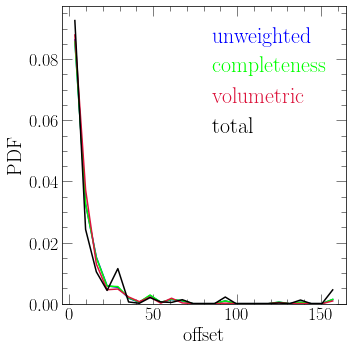

In [42]:
distributions("Offset", "offset")
plt.tight_layout()
plt.show()

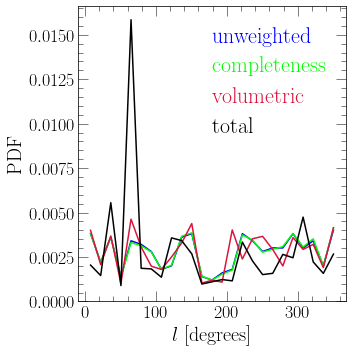

In [39]:
distributions("l", r"$l$ [degrees]")
plt.tight_layout()
plt.show()

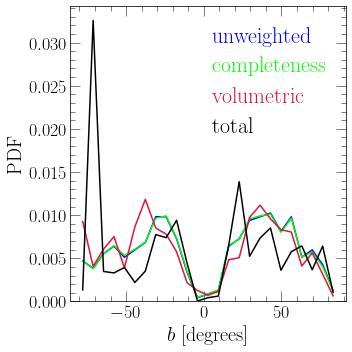

In [40]:
distributions("b", r"$b$ [degrees]")
plt.tight_layout()
plt.show()

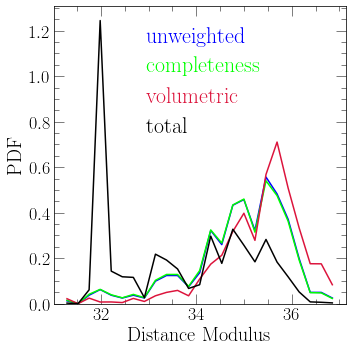

In [44]:
distributions("dist_mod", "Distance Modulus")
plt.tight_layout()
plt.show()